In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load five-fold cross-validation results
filenames = glob.glob("/cephfs/volumes/hpc_data_prj/cb_normalbreast/5bd8c988-b2ab-4eb6-b25f-6e47c2c4b969/prj_BreastAgeNet/RESULTs/main/train_cv/*TestMAE*.png")
filenames = [os.path.basename(i) for i in filenames if ".png" in i]
pattern = r"(?P<bag_content>epi0\.\d)_(?P<feature_extractor>\w+)_(?P<bag_size>\d+)_(?P<attn_mechanism>\w+)_fold(?P<fold>\d+)_TrainValLoss_TestMAE_(?P<test_mae>\d+\.\d+)\.png"

cv_results = []
for filename in filenames:
    match = re.match(pattern, filename)
    if match:
        cv_results.append(match.groupdict())

cv_results = pd.DataFrame(cv_results)
cv_results['bag_size'] = cv_results['bag_size'].astype(int)
cv_results['test_mae'] = cv_results['test_mae'].astype(float)
cv_results['fold'] = cv_results['fold'].astype(int)
cv_results

,bag_content,feature_extractor,bag_size,attn_mechanism,fold,test_mae
0,epi0.9,resnet50,150,MultiHeadAttention,0,0.8503
1,epi0.0,resnet50,150,MultiHeadAttention,0,0.7200
2,epi0.9,resnet50,50,MultiHeadAttention,1,0.7551
6,epi0.9,UNI,250,MultiHeadAttention,2,0.4765
7,epi0.0,UNI,50,MultiHeadAttention,4,0.6437
...,...,...,...,...,...,...
244,epi0.5,UNI,250,MultiHeadAttention,1,0.5867
245,epi0.0,UNI,250,MultiHeadAttention,2,0.6400
246,epi0.9,UNI,250,GatedAttention,1,0.5646
247,epi0.9,phikon,250,GatedAttention,2,0.6599


In [7]:
# Summarise five-fold cross-validation results
stat_df = cv_results.copy()
stat_df["test_mae"] = pd.to_numeric(stat_df["test_mae"], errors='coerce')
stat_df = stat_df.groupby(["bag_content", "bag_size", "feature_extractor", "attn_mechanism"])["test_mae"].agg(["mean", "std"]).reset_index()
stat_df.sort_values(["bag_content", "bag_size",  "feature_extractor", "attn_mechanism"])
stat_df.to_csv("/scratch/prj/cb_normalbreast/prj_BreastAgeNet/RESULTs/figures/Fig1/BreastAgeNet_5CV_results.csv", index=False)
stat_df

,bag_content,bag_size,feature_extractor,attn_mechanism,mean,std
0,epi0.0,50,UNI,MultiHeadAttention,0.620860,0.027548
1,epi0.0,50,resnet50,MultiHeadAttention,0.866400,0.056764
2,epi0.0,100,UNI,MultiHeadAttention,0.641420,0.029380
3,epi0.0,100,resnet50,MultiHeadAttention,0.847720,0.039029
4,epi0.0,150,UNI,MultiHeadAttention,0.610900,0.053453
5,epi0.0,150,resnet50,MultiHeadAttention,0.804450,0.053819
6,epi0.0,250,UNI,MultiHeadAttention,0.614000,0.053193
7,epi0.0,250,resnet50,MultiHeadAttention,0.816767,0.045200
8,epi0.0,350,UNI,MultiHeadAttention,0.633420,0.027142
9,epi0.0,350,resnet50,MultiHeadAttention,0.830360,0.076396


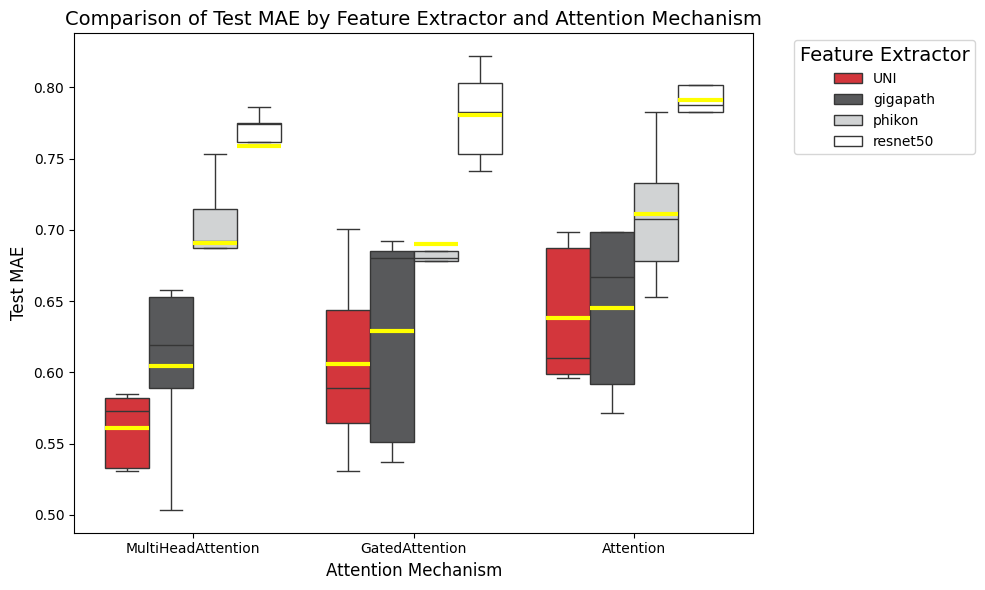

In [96]:
# Plot boxplot showing the performance of experiments using different feature extractors and attention mechanisms (using epi0.9 and a bag size of 250)
boxplot_df = cv_results.loc[
    (cv_results['bag_content'] == 'epi0.9') & (cv_results['bag_size'] == 250), 
    ['attn_mechanism', 'test_mae', 'feature_extractor']
].copy()


attn_order = ['MultiHeadAttention', 'GatedAttention', 'Attention']
model_order = ['UNI', 'gigapath', 'phikon', 'resnet50']
colors = {'UNI': "#ED1C24", 'gigapath': '#58595B', 'phikon': "#D1D3D4", 'resnet50': '#FFFFFF'}
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="attn_mechanism", 
    y="test_mae", 
    hue="feature_extractor", 
    data=boxplot_df, 
    showfliers=False, 
    palette=[colors[m] for m in model_order],  
    width=0.8,  
    # boxprops=dict(alpha=0.7),  
    order=attn_order,  
    hue_order=model_order,  
    dodge=True  
)


# Add means as yellow horizontal lines 
box_positions = {attn: i for i, attn in enumerate(attn_order)}
hue_offset = np.linspace(-0.3, 0.3, len(model_order))  # Adjust dodge offset dynamically
for i, attn in enumerate(attn_order):
    for j, model in enumerate(model_order):
        subset = boxplot_df[(boxplot_df["attn_mechanism"] == attn) & (boxplot_df["feature_extractor"] == model)]
        if not subset.empty:
            mean_value = subset["test_mae"].mean()
            x_pos = box_positions[attn] + hue_offset[j]  # Align with boxplot dodge
            ax.hlines(mean_value, x_pos-0.1, x_pos+0.1, color="yellow", linewidth=3, zorder=3)


plt.title("Comparison of Test MAE by Feature Extractor and Attention Mechanism", fontsize=14)
plt.xlabel("Attention Mechanism", fontsize=12)
plt.ylabel("Test MAE", fontsize=12)
plt.legend(title="Feature Extractor", title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("/scratch_tmp/prj/cb_normalbreast/prj_BreastAgeNet/RESULTs/evaluation/BreastAgeNet_5CV_bag_content_size_boxplot.pdf", dpi=300, bbox_inches="tight")
plt.show()

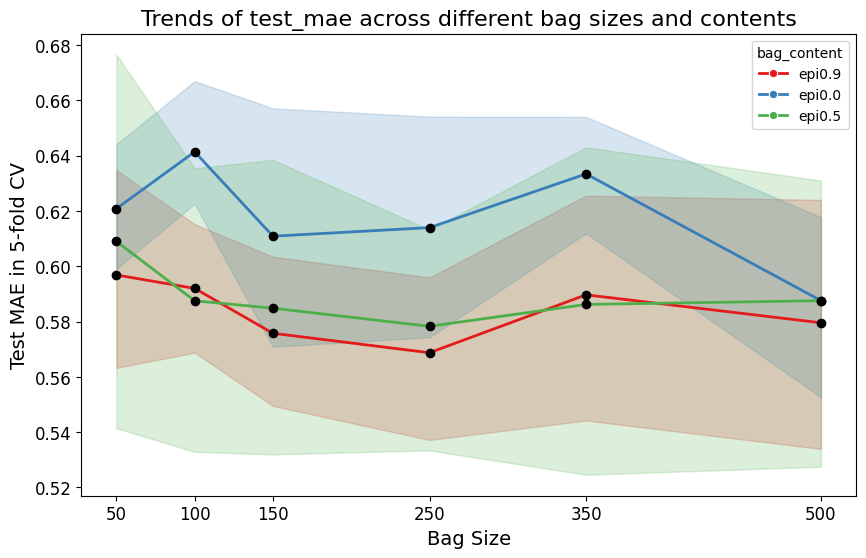

In [9]:
# Plot lineplot showing the performance of experiments using different bag contents and sizes (using UNI and MultiHeadAttention)
plot_df = cv_results[(cv_results['feature_extractor'] == 'UNI') & (cv_results['attn_mechanism'] == 'MultiHeadAttention')].copy()
plot_df['bag_size'] = plot_df['bag_size'].astype(int)
plot_df['test_mae'] = plot_df['test_mae'].astype(float)
plot_df['fold'] = plot_df['fold'].astype(int)

set1_colors = sns.color_palette("Set1", 3)
custom_palette = {
    'epi0.9': set1_colors[0],  
    'epi0.0': set1_colors[1], 
    'epi0.5': set1_colors[2], 
}

plt.figure(figsize=(10, 6))
sns.lineplot(
    x="bag_size", 
    y="test_mae", 
    hue="bag_content", 
    data=plot_df, 
    palette=custom_palette,  # Use the custom colors
    marker="o",  
    lw=2,  
)

means = plot_df.groupby(['bag_size', 'bag_content'])['test_mae'].mean().reset_index()
for _, mean in means.iterrows():
    ax = plt.gca()  
    ax.plot(mean['bag_size'], mean['test_mae'], 'ko') 

plt.title("Trends of test_mae across different bag sizes and contents", fontsize=16)
plt.xlabel("Bag Size", fontsize=14)
plt.ylabel("Test MAE in 5-fold CV", fontsize=14)
plt.xticks([50, 100, 150, 250, 350, 500], fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("/scratch/prj/cb_normalbreast/prj_BreastAgeNet/RESULTs/figures/Fig1/BreastAgeNet_5CV_UNI_MHSA_lineplot.pdf", dpi=300, bbox_inches="tight")
plt.show()